In [1]:
import numpy as np
from ccdEvent4 import *
import matplotlib.pyplot as plt

In [2]:
fileName1 = "pixelInfo_mu_slant2.dat"

In [3]:
evt1 = ccdEvent(fileName1)

In [4]:
xpixList = []
ypixList = []

In [5]:
npix = evt1.GetNPixelHits()


In [6]:
for ij in range(npix):
    xpixList.append(evt1.GetPixelHit(ij).GetXPixel())
    ypixList.append(evt1.GetPixelHit(ij).GetYPixel())

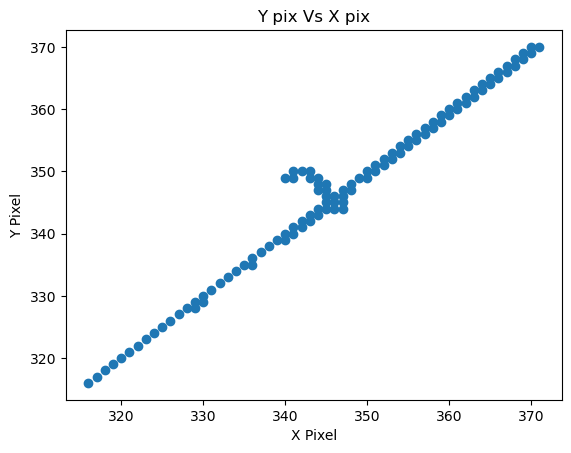

<Figure size 640x480 with 0 Axes>

In [53]:
plt.scatter(xpixList, ypixList)
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('Y pix Vs X pix')
plt.show()
plt.savefig('Muon Xpix Vs Ypix.png', dpi=100)

In [52]:
ccdHoughCell.GetSlope()

TypeError: ccdHoughCell.GetSlope() missing 1 required positional argument: 'self'

In [30]:
hough_hits, thetaList, rhoList = evt1.ApplyHoughTransform()

In [9]:
type(hough_hits[0])

ccdEvent4.ccdHoughCell

In [10]:
for hit in hough_hits:
    pix1 = hit.GetPixel1()
    pix2 = hit.GetPixel2()

In [12]:
selected_x = [hit.GetPixel1().GetXPixel() for hit in hough_hits]
selected_y = [hit.GetPixel1().GetYPixel() for hit in hough_hits]

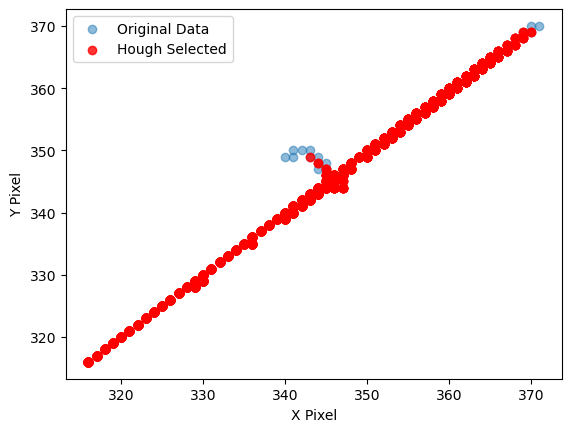

<Figure size 640x480 with 0 Axes>

In [42]:
plt.scatter(xpixList, ypixList, label="Original Data", alpha=0.5)
plt.scatter(selected_x, selected_y, color='r', label="Hough Selected", alpha=0.8)
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.legend()
plt.show()
plt.savefig('Hough selected.png', dpi = 100)

In [33]:
houghRho = [cell.GetRho() for cell in hough_hits]
houghTheta = [cell.GetTheta() for cell in hough_hits]

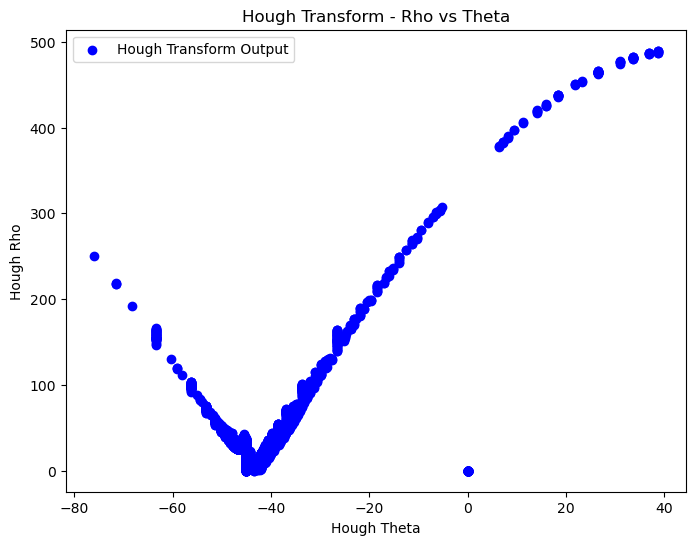

<Figure size 640x480 with 0 Axes>

In [44]:
rho_values = houghRho #[cell.GetRho() for cell in houghRho]
theta_values = houghTheta #[cell.GetTheta() for cell in houghTheta]

plt.figure(figsize=(8, 6))
plt.scatter(houghTheta, houghRho , color='b', label='Hough Transform Output')
plt.xlabel("Hough Theta")
plt.ylabel("Hough Rho")
plt.title("Hough Transform - Rho vs Theta")
plt.legend()
plt.show()
plt.savefig('Hough Rho VS Hough Theta.png', dpi = 100)

In [37]:
intercepts = [cell.GetIntercept() for cell in hough_hits]

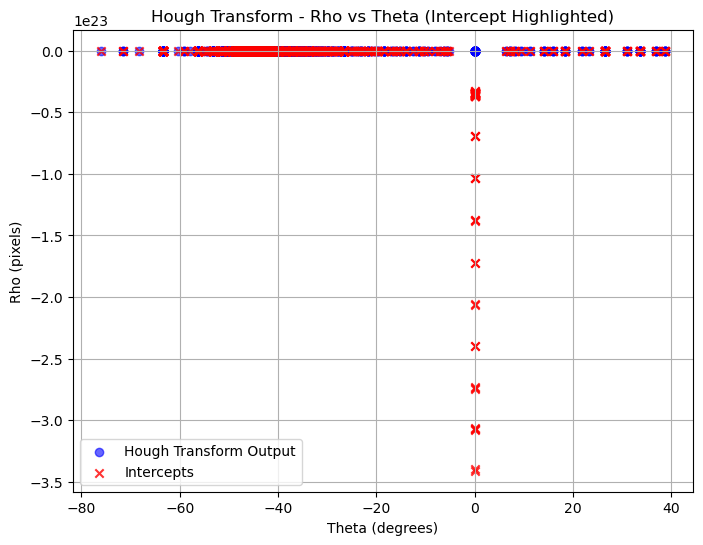

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(houghTheta, houghRho, color='b', label='Hough Transform Output', alpha=0.6)

# Highlight intercepts with a different color (e.g., red)
plt.scatter(houghTheta, intercepts, color='r', label='Intercepts', marker='x', alpha=0.8)

# Labels and Title
plt.xlabel("Theta (degrees)")
plt.ylabel("Rho (pixels)")
plt.title("Hough Transform - Rho vs Theta (Intercept Highlighted)")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
intercepts_norm = (intercepts - np.min(intercepts)) / (np.max(intercepts) - np.min(intercepts))

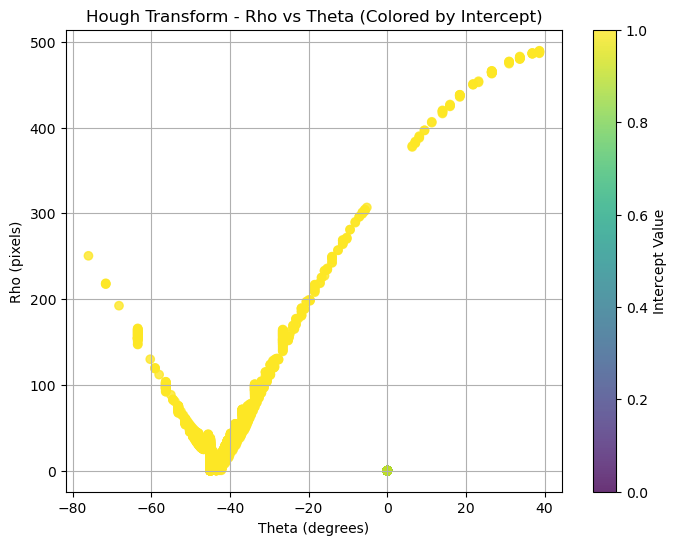

In [50]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(houghTheta, houghRho, c=intercepts_norm, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label("Intercept Value")

# Labels and Title
plt.xlabel("Theta (degrees)")
plt.ylabel("Rho (pixels)")
plt.title("Hough Transform - Rho vs Theta (Colored by Intercept)")
plt.grid(True)
plt.show()

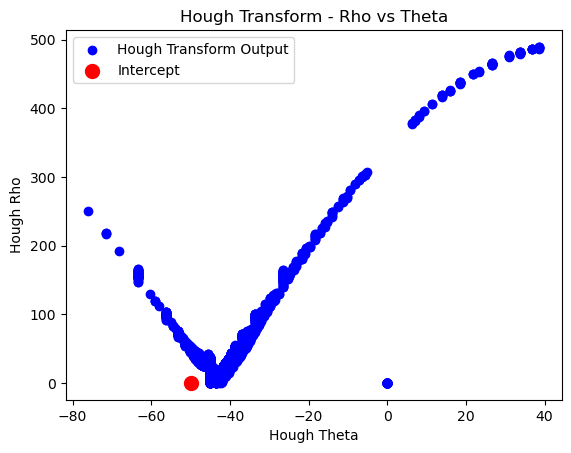

In [51]:
intercept_theta = -50  # Replace with actual value
intercept_rho = 0  # Replace with actual value

# Plot all points in blue
plt.scatter(theta_values, rho_values, color='blue', label='Hough Transform Output')

# Highlight the intercept in red
plt.scatter(intercept_theta, intercept_rho, color='red', s=100, label='Intercept')

# Labels and title
plt.xlabel("Hough Theta")
plt.ylabel("Hough Rho")
plt.title("Hough Transform - Rho vs Theta")
plt.legend()

# Show the plot
plt.show()